In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
dim = x_train[0].shape
dim

(32, 32, 3)

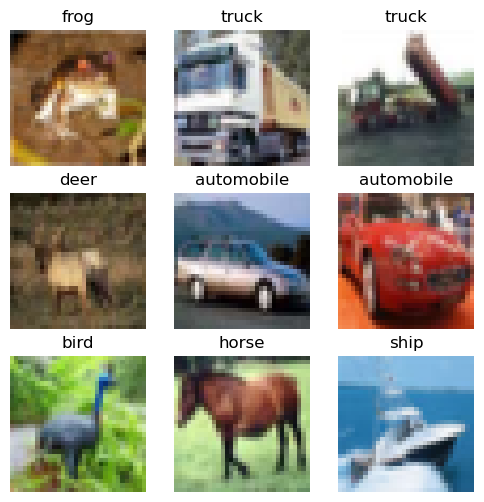

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [5]:
# model = models.Sequential([
#     layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape = dim),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#     layers.Conv2D(192, (3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(len(class_names), activation='softmax')
# ])
# commented one is too slow it is alexnet
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


C:\Users\Harshvardhan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.1755 - loss: 2.2735 - val_accuracy: 0.2607 - val_loss: 2.0544
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.2614 - loss: 1.9950 - val_accuracy: 0.3398 - val_loss: 1.8102
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.3191 - loss: 1.8519 - val_accuracy: 0.3561 - val_loss: 1.7706
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.3638 - loss: 1.7564 - val_accuracy: 0.4099 - val_loss: 1.6278
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.3927 - loss: 1.6663 - val_accuracy: 0.4048 - val_loss: 1.5790
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.4282 - loss: 1.5904 - val_accuracy: 0.4491 - val_loss: 1.5098
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.4452 - loss: 1.5399 - val_accuracy: 0.4392 - val_loss: 1.5295
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.4654 - loss: 1

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


313/313 - 4s - 12ms/step - accuracy: 0.4599 - loss: 1.4211
Test Accuracy: 0.4599, Test Loss: 1.4211


Text(0, 0.5, 'Loss')

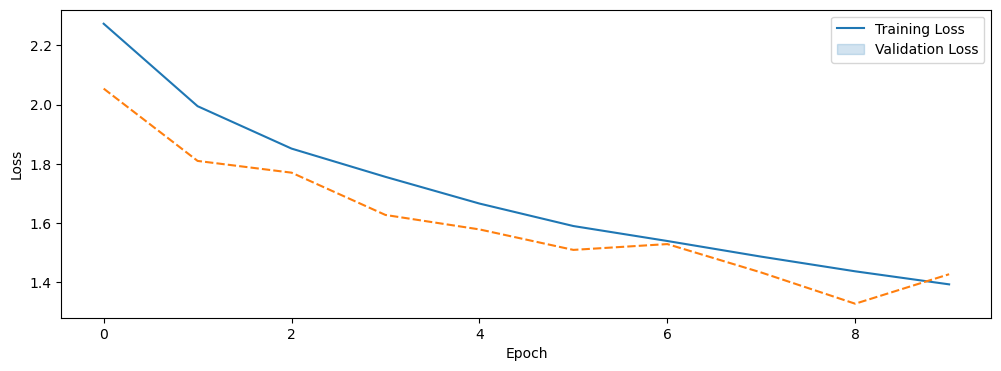

In [9]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(history.history)

sns.lineplot(data=df[['loss', 'val_loss']])
plt.legend(labels=['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

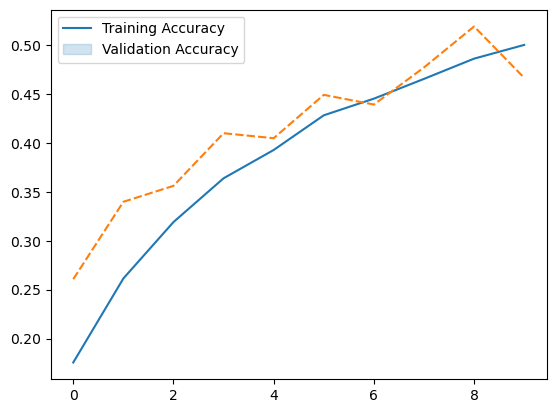

In [10]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])
plt.legend(labels=['Training Accuracy', 'Validation Accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
deer


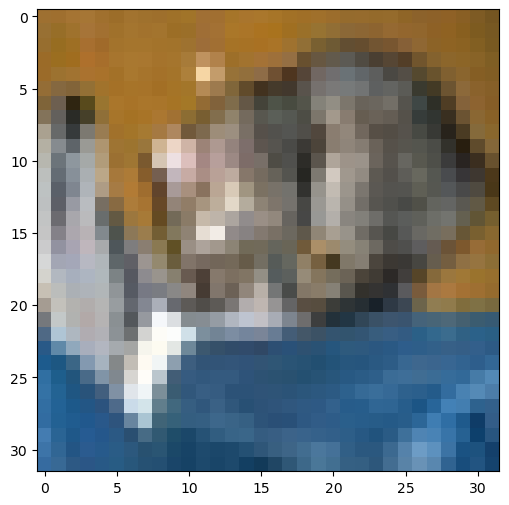

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
img = x_test[0].astype('float32') / 255.0
pred = model.predict(np.expand_dims(img, axis=0))
print(class_names[pred.argmax()])
plt.figure(figsize=(6, 6))
plt.imshow(x_test[0])

In [14]:

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.66      0.48      0.55      1000
           1       0.86      0.09      0.16      1000
           2       0.60      0.13      0.21      1000
           3       0.44      0.21      0.28      1000
           4       0.30      0.65      0.41      1000
           5       0.55      0.23      0.32      1000
           6       0.60      0.55      0.57      1000
           7       0.42      0.73      0.53      1000
           8       0.64      0.66      0.65      1000
           9       0.40      0.87      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.55      0.46      0.42     10000
weighted avg       0.55      0.46      0.42     10000

